In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r"C:\Users\Admin\Downloads\mSda\mobile_phones_2000.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Brand                 2000 non-null   object 
 1   Model                 2000 non-null   object 
 2   Price (USD)           2000 non-null   float64
 3   Selling Platform      2000 non-null   object 
 4   Rating                2000 non-null   float64
 5   Refresh Rate (Hz)     2000 non-null   int64  
 6   Screen Size (inches)  2000 non-null   float64
 7   RAM (GB)              2000 non-null   int64  
 8   Storage (GB)          2000 non-null   int64  
 9   Processor             2000 non-null   object 
 10  Camera Setup          2000 non-null   object 
dtypes: float64(3), int64(3), object(5)
memory usage: 172.0+ KB


In [4]:
df.head(5)

,Brand,Model,Price (USD),Selling Platform,Rating,Refresh Rate (Hz),Screen Size (inches),RAM (GB),Storage (GB),Processor,Camera Setup
0,OnePlus,Narzo Edge 16,1286.64,Best Buy,3.5,165,7.2,16,128,Snapdragon 8+ Gen 1,12MP + 16MP + 5MP
1,Sony,Pixel Max 24,728.52,eBay,4.6,90,6.1,4,64,Dimensity 920,48MP + 8MP + 5MP
2,Samsung,Reno Plus 23,1086.68,Official Store,3.4,60,6.2,12,64,Exynos 2200,200MP + 12MP + 8MP
3,Apple,Redmi Note Mini 16,1158.78,Official Store,3.5,120,7.1,6,128,A16 Bionic,50MP + 50MP + 2MP
4,Vivo,P Series Edge 13,1656.05,Reliance Digital,4.9,165,6.1,8,512,Helio G99,64MP + 50MP + 8MP


In [6]:
df.describe()

,Price (USD),Rating,Refresh Rate (Hz),Screen Size (inches),RAM (GB),Storage (GB)
count,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1085.496980,3.99005,116.086500,6.268250,9.171000,378.304000
std,526.886705,0.57630,37.199596,0.734974,4.400505,339.345696
min,151.930000,3.00000,60.000000,5.000000,4.000000,64.000000
25%,644.187500,3.50000,90.000000,5.600000,6.000000,128.000000
50%,1081.455000,4.00000,120.000000,6.300000,8.000000,256.000000
75%,1546.532500,4.50000,144.000000,6.900000,12.000000,512.000000
max,1999.260000,5.00000,165.000000,7.500000,16.000000,1024.000000


In [7]:
df.isna().sum()

Brand                   0
Model                   0
Price (USD)             0
Selling Platform        0
Rating                  0
Refresh Rate (Hz)       0
Screen Size (inches)    0
RAM (GB)                0
Storage (GB)            0
Processor               0
Camera Setup            0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [12]:
df.columns

Index(['Brand', 'Model', 'Price (USD)', 'Selling Platform', 'Rating',
       'Refresh Rate (Hz)', 'Screen Size (inches)', 'RAM (GB)', 'Storage (GB)',
       'Processor', 'Camera Setup'],
      dtype='object')

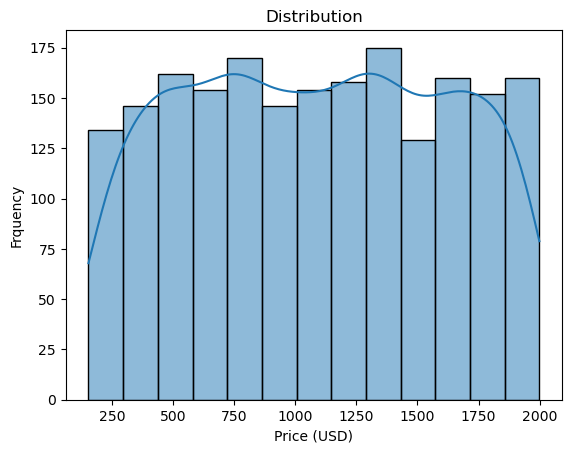

In [13]:
sns.histplot(df['Price (USD)'], kde=True)
plt.title('Distribution')
plt.xlabel('Price (USD)')
plt.ylabel('Frquency')
plt.show()

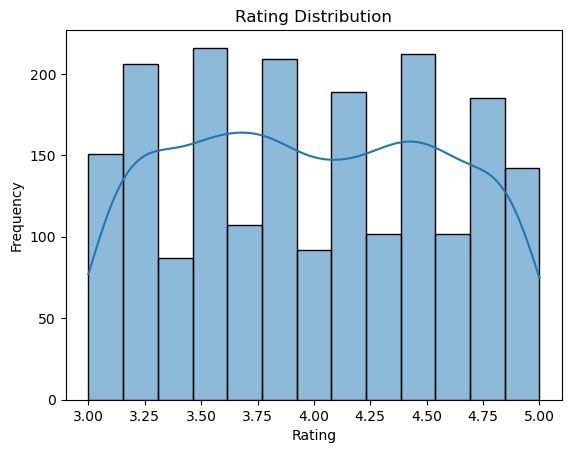

In [16]:
sns.histplot(df['Rating'], kde=True)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

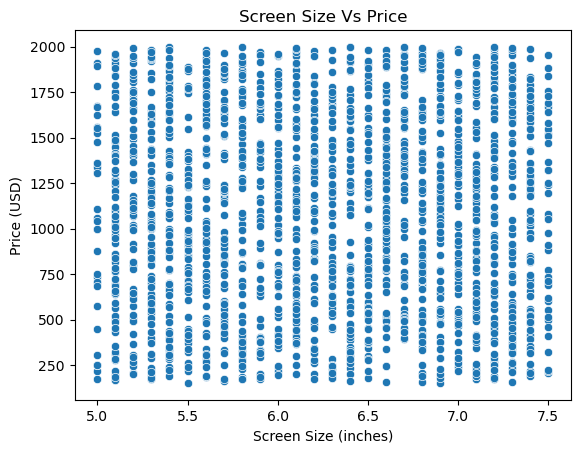

In [20]:
sns.scatterplot(x='Screen Size (inches)', y='Price (USD)', data=df)
plt.title('Screen Size Vs Price')
plt.xlabel('Screen Size (inches)')
plt.ylabel('Price (USD)')
plt.show()

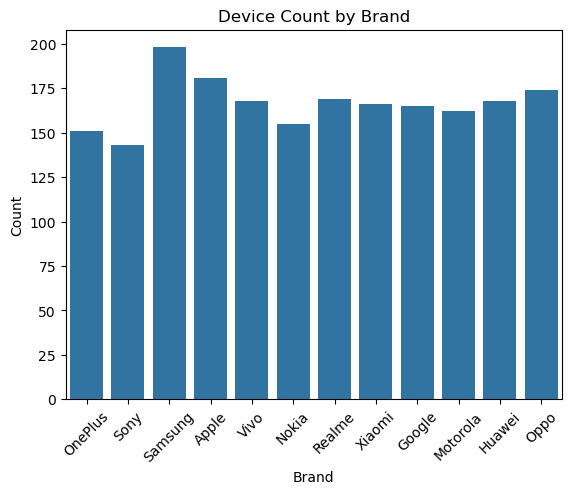

In [21]:
sns.countplot(x='Brand', data=df)
plt.title('Device Count by Brand')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

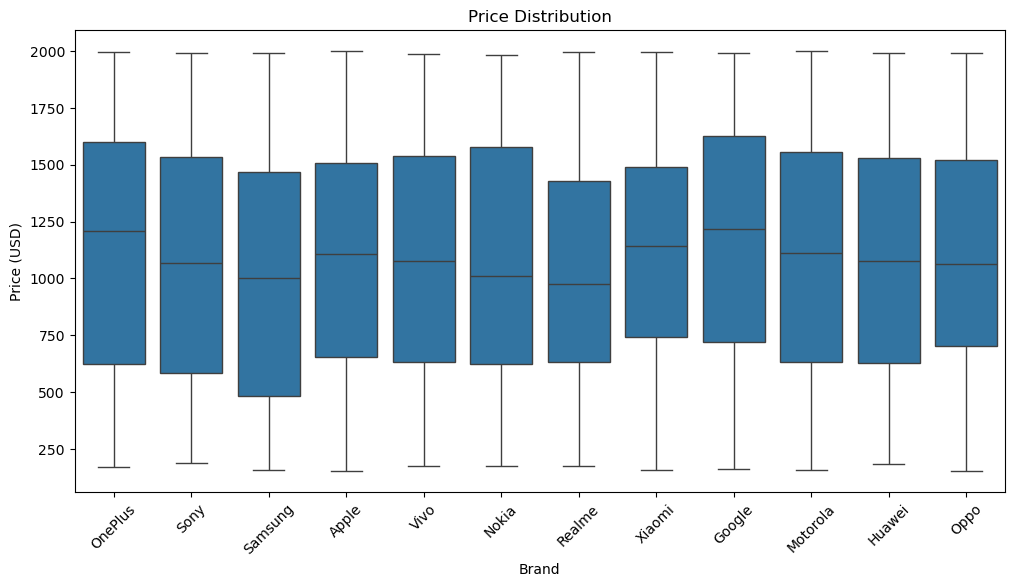

In [36]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Brand', y='Price (USD)', data=df)
plt.title('Price Distribution')
plt.xticks(rotation=45)
plt.show()

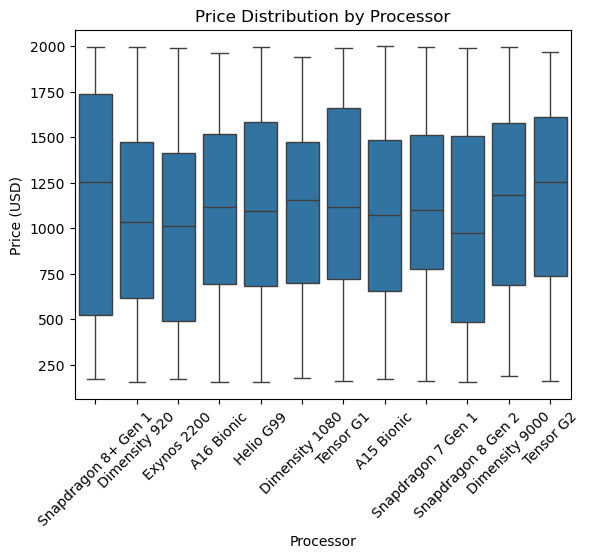

In [37]:
sns.boxplot(x='Processor', y='Price (USD)', data=df)
plt.title('Price Distribution by Processor')
plt.xlabel('Processor')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45)
plt.show()

# Data Cleaning

In [26]:
df.isna().sum()

Brand                   0
Model                   0
Price (USD)             0
Selling Platform        0
Rating                  0
Refresh Rate (Hz)       0
Screen Size (inches)    0
RAM (GB)                0
Storage (GB)            0
Processor               0
Camera Setup            0
dtype: int64

# Grouping

In [29]:
average_price_brand = df.groupby('Brand')['Price (USD)'].mean().round(2).sort_values(ascending=False)
print(average_price_brand)

Brand
Google      1160.95
Xiaomi      1123.51
OnePlus     1120.71
Apple       1092.83
Motorola    1089.49
Oppo        1086.67
Huawei      1085.85
Sony        1080.52
Vivo        1080.10
Nokia       1067.51
Realme      1041.74
Samsung     1012.18
Name: Price (USD), dtype: float64


In [32]:
average_rating_Platform = df.groupby('Selling Platform')['Rating'].mean().round(2).sort_values(ascending=False)
print(average_rating_Platform)

Selling Platform
Walmart             4.05
Reliance Digital    4.03
Flipkart            4.01
AliExpress          3.98
Official Store      3.97
eBay                3.97
Amazon              3.96
Best Buy            3.95
Name: Rating, dtype: float64


In [41]:
df.groupby(['Brand', 'RAM (GB)'])['Price (USD)'].mean()

Brand     RAM (GB)
Apple     4           1130.436486
          6           1155.029773
          8           1256.876585
          12          1003.813750
          16           796.353704
Google    4            938.954375
          6           1257.847027
          8           1172.530645
          12          1233.723000
          16          1188.862571
Huawei    4           1007.701429
          6           1109.162895
          8           1174.429286
          12           997.246129
          16          1122.329767
Motorola  4           1133.045333
          6           1225.190000
          8            974.989355
          12          1050.272000
          16          1042.346667
Nokia     4           1206.021000
          6            920.087000
          8           1048.803571
          12          1097.705556
          16          1066.919000
OnePlus   4           1127.068462
          6           1154.081200
          8           1134.093200
          12          1191.64

In [1]:
df.to_csv(r"C:\Users\Admin\Downloads\mSda\cleaned_data.csv", index=False)

NameError: name 'df' is not defined